**Goal**: Given Shop ID and Item ID, forecast Item count in November 2015

**Data**: https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data

In [752]:
import pandas as pd

Considering which datasets to use and reading in relevant datasets amongst:
- sales_train_v2
- items
- items_categories
- shops

In [753]:
data = pd.read_csv('future_sales/sales_train_v2.csv')

## Exploratory Data Analysis

In [754]:
data.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [755]:
data.shape             

(2935849, 6)

We observe that the dataset has 2935849 observations.

In [756]:
data.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

Let's convert data into types that are easy for analysis.
- date: from object type to datetime type

In [757]:
data.date = pd.to_datetime(data['date'], format = '%d.%m.%Y')

In [758]:
data['month'] = data.date.dt.month

In [759]:
data['year'] = data.date.dt.year

In [760]:
data.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
0,2013-01-02,0,59,22154,999.0,1.0,1,2013
1,2013-01-03,0,25,2552,899.0,1.0,1,2013
2,2013-01-05,0,25,2552,899.0,-1.0,1,2013


We observe that some values of item_cnt_day column are negative. We want to remove these as item count should be positive. Before that, let's check if there are missing values.

In [761]:
print(data.isna().sum())

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
month             0
year              0
dtype: int64


Let's now explore the negative values in item_cnt_day column.

In [762]:
data.loc[data["item_cnt_day"]<0]        #select rows which have negative item counts

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
2,2013-01-05,0,25,2552,899.00,-1.0,1,2013
148,2013-01-23,0,25,2321,999.00,-1.0,1,2013
175,2013-01-07,0,25,2199,1449.00,-1.0,1,2013
807,2013-01-02,0,25,2330,599.00,-1.0,1,2013
1041,2013-01-13,0,25,5034,1989.00,-1.0,1,2013
1193,2013-01-02,0,25,5651,5490.00,-1.0,1,2013
1674,2013-01-07,0,25,4093,899.00,-1.0,1,2013
1825,2013-01-02,0,25,4249,1894.87,-1.0,1,2013
2411,2013-01-14,0,24,1628,3899.00,-1.0,1,2013
3216,2013-01-08,0,24,20948,899.00,-1.0,1,2013


Compared to 2935849 values, 7356 is relatively small. Therefore, we will drop these 7356 values.

In [763]:
data = data[data["item_cnt_day"]>=0] 

In [764]:
data.shape             #we have successfully dropped the negative item count values.

(2928493, 8)

Next, let's explore the price variable for outliers. This is also because we know that irregular activities such as seasonal promotions may affect sales.

In [765]:
data.item_price.describe()

count    2.928493e+06
mean     8.894664e+02
std      1.727498e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

The negative price does not make sense and we should remove it. While the 75% percentile and max has a big disparity, 300,000 for an item may make sense depending on the item.

In [766]:
data = data[data["item_price"]>=0] 

Let's do some exploratory analysis to understand the data better. 
- We want to visualize the total items sold by each of the shops
- We also want to deep dive on a few shops to analyze the products in more detail

In [767]:
#Display how many items a shop sells
data.pivot_table(index = ["shop_id","item_id"], values = "item_cnt_day")

item_cnt_day
shop_id item_id              
0       30           3.444444
        31           1.571429
        32           1.454545
        33           1.000000
        35           1.250000
        36           1.000000
        40           1.000000
        42           1.000000
        43           1.000000
        49           1.000000
        51           1.250000
        57           1.000000
        59           1.000000
        61           1.000000
        75           1.000000
        85           1.000000
        88           1.000000
        95           1.000000
        96           1.000000
        97           1.000000
        98           1.666667
        111          1.000000
        115          1.000000
        136          1.000000
        149          1.000000
        151          1.000000
        152          1.000000
        153          1.000000
        198          1.000000
        199          1.000000
...                       ...
59      22079        1.000000
        22087        1.593985
        22088        1.488722
        22091        1.344828
        22092        1.634615
        22100        1.000000
        22102        1.000000
        22104        1.000000
        22105        1.000000
        22106        1.000000
        22114        1.000000
        22115        1.000000
        22118        1.000000
        22126        1.000000
        22130        1.000000
        22132        1.000000
        22134        1.500000
        22139        1.000000
        22141        1.000000
        22143        1.142857
        22144        1.000000
        22145        1.000000
        22150        1.000000
        22151        1.000000
        22153        1.000000
        22154        1.000000
        22155        1.000000
        22162        1.000000
        22164        1.000000
        22167        1.000000

[424098 rows x 1 columns]

In [768]:
#What about the sum of items sold by each shop? Which are the most popular shops?
data.pivot_table(index = "shop_id", values = "item_cnt_day", aggfunc="sum").sort_values(by = "item_cnt_day", ascending=False)

,item_cnt_day
shop_id,
31,311230.0
25,242237.0
54,186149.0
28,184777.0
42,145195.0
57,141424.0
27,136815.0
6,100757.0
58,81908.0


In [769]:
data.pivot_table(index = ["month","year","item_id"], values = "item_cnt_day")

item_cnt_day
month year item_id              
1     2013 19           1.000000
           27           1.000000
           28           1.000000
           29           1.000000
           32           1.328889
           33           1.051724
           34           1.000000
           35           1.418182
           40           1.000000
           41           1.000000
           42           1.000000
           43           1.000000
           44           1.000000
           45           1.000000
           46           1.000000
           47           1.000000
           48           1.000000
           49           1.000000
           50           1.000000
           51           1.000000
           52           1.000000
           53           1.000000
           54           1.000000
           55           1.000000
           56           1.000000
           57           1.000000
           59           1.000000
           60           1.000000
           61           1.000000
           63           1.000000
...                          ...
12    2014 22050        1.000000
           22054        1.000000
           22058        1.000000
           22059        1.000000
           22060        1.000000
           22068        1.000000
           22070        1.166667
           22071        1.000000
           22072        1.000000
           22073        1.180000
           22076        1.101695
           22087        1.495935
           22088        2.023392
           22091        1.326923
           22092        1.851351
           22105        1.000000
           22106        1.000000
           22111        1.272727
           22114        1.000000
           22118        1.066667
           22127        1.000000
           22133        1.000000
           22135        1.000000
           22139        1.000000
           22140        1.000000
           22145        1.000000
           22146        1.000000
           22153        1.000000
           22166        1.222222
           22167        1.081081

[233802 rows x 1 columns]

In [770]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
reg1 = smf.ols('item_cnt_day ~ item_price', data = data).fit()

print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:           item_cnt_day   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     417.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           9.43e-93
Time:                        18:57:07   Log-Likelihood:            -6.9753e+06
No. Observations:             2928492   AIC:                         1.395e+07
Df Residuals:                 2928490   BIC:                         1.395e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2322      0.002    715.732      0.0

## Treating the problem as a time-series problem

For time-series analysis, every datapoint is important. We do not want to delete any datapoints, so we will read in the data again.

In [771]:
timeseries = pd.read_csv('future_sales/sales_train_v2.csv')

In [772]:
timeseries.date = pd.to_datetime(timeseries['date'], format = '%d.%m.%Y')

From here, we will create 2 different datasets, one with Datetime index and one without. The objective is to see how useful the Datetime index is.

In [773]:
timeseriesNULL = timeseries.copy()

In [774]:
timeseries.set_index("date",inplace = True)    #set Datetime Index for first dataset

Now, let's create the day, month, year, dayofweek columns

In [775]:
timeseries['year'] = timeseries.index.year
timeseries['month'] = timeseries.index.month
timeseries['day'] = timeseries.index.day
timeseries['day_of_week'] = timeseries.index.dayofweek

In [776]:
timeseriesNULL['year'] = timeseriesNULL.date.dt.year
timeseriesNULL['month'] = timeseriesNULL.date.dt.month
timeseriesNULL['day'] = timeseriesNULL.date.dt.day
timeseriesNULL['day_of_week'] = timeseriesNULL.date.dt.dayofweek

For dayofweek, 0: Monday, 6: Sunday.

Let's create a weekend variable to visualize differences between weekdays and weekends.

In [777]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6: 
        return 1
    else: 
        return 0 

timeseries['weekend'] = timeseries.index.to_series().apply(applyer)      #convert index to a series, and then apply function to it 

In [778]:
timeseriesNULL['weekend'] = timeseriesNULL['date'].apply(applyer)

Let's plot a graph with x-axis as time, y-axis as item_cnt_day.

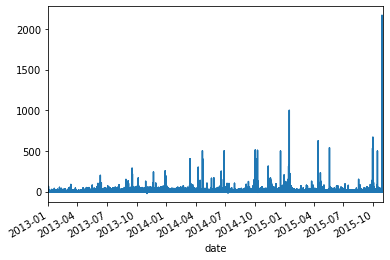

In [779]:
timeseries["item_cnt_day"].plot()

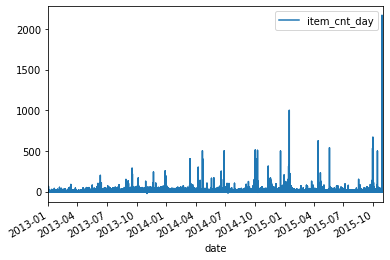

In [780]:
timeseriesNULL.plot(x = "date", y ="item_cnt_day")

Seems that there is a spike at the end of 2015. Let's visualize item_cnt_day on a yearly level.

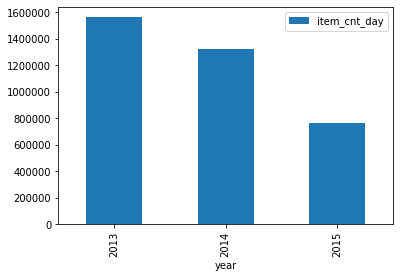

In [781]:
timeseries.pivot_table(index = "year", values = "item_cnt_day", aggfunc = "sum").plot(kind = "bar")

Wow you can use DatetimeIndex with pivot table. That's great. Seems that item count has been decreasing across the years.

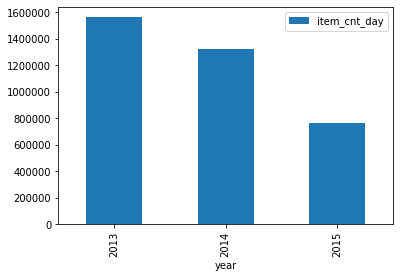

In [782]:
timeseriesNULL.pivot_table(index = "year", values = "item_cnt_day", aggfunc = "sum").plot(kind = "bar")

What about monthly count?

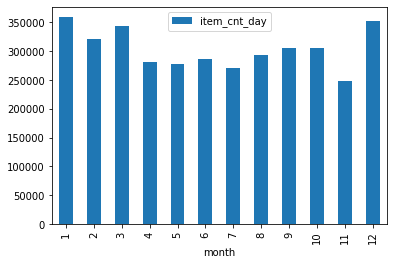

In [783]:
timeseries.pivot_table(index = "month", values = "item_cnt_day", aggfunc = "sum").plot(kind = "bar")

We can observe an increase in December. Perhaps that the holiday season, causing people to buy more. Let's visualize this based on year and month.

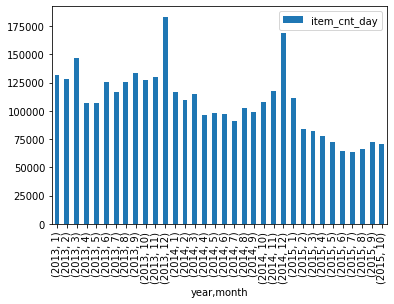

In [784]:
timeseries.pivot_table(index = ["year", "month"], values = "item_cnt_day", aggfunc = "sum").plot(kind = "bar")

Weird, now we see the spikes in Dec 2013 and Dec 2014 instead, while Dec 2015 has an abnormally low number. 

If we compare the number on this graph, and the above one - timeseries["item_cnt_day"].plot() - we notice that the numbers are on a totally different scale. 

More importantly, we observe this as a decreasing trend, while the above one has an increasing trend. What is going on?

It's likely that the above graph just counts how many actually purchase an item on a particular day, rather than the aggregate of items purchased.

Let's try to verify this.

In [785]:
timeseries["2015-09":"2015-12"]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,day_of_week,weekend
date,,,,,,,,,,
2015-09-10,32,42,11170,58.0,1.0,2015,9,10,3,0
2015-09-06,32,42,11215,349.0,1.0,2015,9,6,6,1
2015-09-10,32,42,11215,349.0,1.0,2015,9,10,3,0
2015-09-22,32,42,11215,349.0,1.0,2015,9,22,1,0
2015-09-28,32,42,11232,299.0,1.0,2015,9,28,0,0
2015-09-19,32,42,11252,449.0,1.0,2015,9,19,5,1
2015-09-18,32,42,11253,649.0,1.0,2015,9,18,4,0
2015-09-08,32,42,11354,3999.0,3.0,2015,9,8,1,0
2015-09-24,32,42,11259,49.0,1.0,2015,9,24,3,0


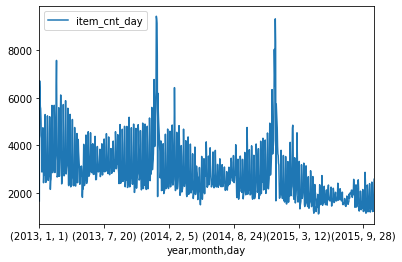

In [786]:
timeseries.pivot_table(index = ["year", "month", "day"], values = "item_cnt_day",aggfunc = len).plot()

In [787]:
timeseries["item_cnt_day"].describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

Now we know the culprit! The graph is plotting the max item_cnt on a daily level. We can view this by using the loc function:

In [788]:
timeseriesNULL.loc[timeseriesNULL["item_cnt_day"]==2169]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,day_of_week,weekend
2909818,2015-10-28,33,12,11373,0.908714,2169.0,2015,10,28,2,0


Surprisingly, you can use loc to index normally, with DatetimeIndex too. I was only unable to do so earlier because I used .loc() instead of square brackets, and hypothesised that DatetimeIndex has limited functionality. Now I know!

In [789]:
timeseries.loc[timeseries["item_cnt_day"]==2169]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,day_of_week,weekend
date,,,,,,,,,,
2015-10-28,33,12,11373,0.908714,2169.0,2015,10,28,2,0


Now that we know DatetimeIndex has normal functionality as the normal Dataframe, we shall continue to use the timeseries dataset. 

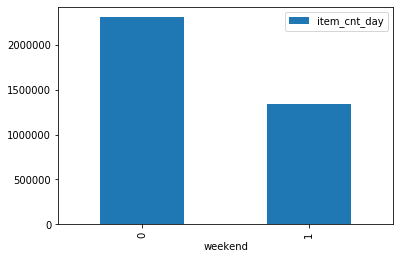

In [790]:
timeseries.pivot_table(index="weekend",values="item_cnt_day",aggfunc="sum").plot(kind="bar")

Let's summarize what we know now:
- item count has been decreasing from 2013 to 2015
- there are two spikes in Dec 2013 and Dec 2014, while Nov and Dec 2015 have low item counts. Could there be some event causing this?
- people usually buy items on weekdays compared to weekends

Next, let's move on to forecasting future sales. Given that we notice a negative trend going on, we should use methods that take into account trend such as Holt's method or ARIMA.

Let us first assign a frequency to our time series, and do seasonal decomposition.

### Resampling method for decomposition

1. Pivoting to remove duplicate dates
2. Assigning daily frequency
3. resampling to monthly frequency for decomposition

In [791]:
timeseries.pivot_table(index = ["year","month"],values = "item_cnt_day", aggfunc = "sum")

item_cnt_day
year month              
2013 1          131479.0
     2          128090.0
     3          147142.0
     4          107190.0
     5          106970.0
     6          125381.0
     7          116966.0
     8          125291.0
     9          133332.0
     10         127541.0
     11         130009.0
     12         183342.0
2014 1          116899.0
     2          109687.0
     3          115297.0
     4           96556.0
     5           97790.0
     6           97429.0
     7           91280.0
     8          102721.0
     9           99208.0
     10         107422.0
     11         117845.0
     12         168755.0
2015 1          110971.0
     2           84198.0
     3           82014.0
     4           77827.0
     5           72295.0
     6           64114.0
     7           63187.0
     8           66079.0
     9           72843.0
     10          71056.0

In [792]:
timeseries[timeseries.index.duplicated()].head(10)   #cannot do asfreq when have duplicated data, have to aggregate all together

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,day_of_week,weekend
date,,,,,,,,,,
2013-01-02,0,25,2565,549.0,1.0,2013,1,2,2,0
2013-01-03,0,25,2573,299.0,3.0,2013,1,3,3,0
2013-01-03,0,25,2574,399.0,2.0,2013,1,3,3,0
2013-01-05,0,25,2574,399.0,1.0,2013,1,5,5,1
2013-01-10,0,25,2574,399.0,1.0,2013,1,10,3,0
2013-01-11,0,25,2574,399.0,2.0,2013,1,11,4,0
2013-01-16,0,25,2604,299.0,1.0,2013,1,16,2,0
2013-01-27,0,25,2604,299.0,1.0,2013,1,27,6,1
2013-01-27,0,25,2607,279.0,1.0,2013,1,27,6,1


In [793]:
a = timeseries.pivot_table(index=["date"], aggfunc= {"item_cnt_day":sum})   #this aggregates the data and removes duplicates
a.head(10)

,item_cnt_day
date,
2013-01-01,1951.0
2013-01-02,8198.0
2013-01-03,7422.0
2013-01-04,6617.0
2013-01-05,6346.0
2013-01-06,5858.0
2013-01-07,4984.0
2013-01-08,4772.0
2013-01-09,3162.0


In [794]:
a = a.asfreq('D', method = 'ffill')            #only works properly if it's a dataframe or series. Multi-index pivot table doesn't work
                                               #ffill to fill empty rows since decomposition cannot handle missing values

In [795]:
resample = a.resample('M')
monthly_total_sales = resample.sum()
monthly_total_sales.head(5)

,item_cnt_day
date,
2013-01-31,131479.0
2013-02-28,128090.0
2013-03-31,147142.0
2013-04-30,107190.0
2013-05-31,106970.0


In [796]:
#check freq of timeseries
print(a.index.freq)

<Day>


Now that we assigned a daily frequency to our time series, we can do seasonal decomposition.

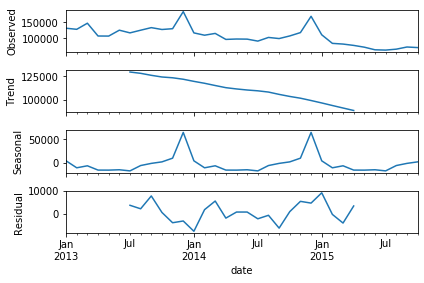

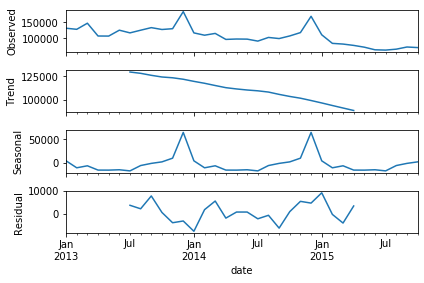

In [797]:
#Decomposition: visualize the trend, seasonality and error in series
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(monthly_total_sales.item_cnt_day).plot()       

From resampling to monthly frequency, we can then see the trend a lot more clearly. Decomposing at daily frequency doesn't give us a visible trend at all.

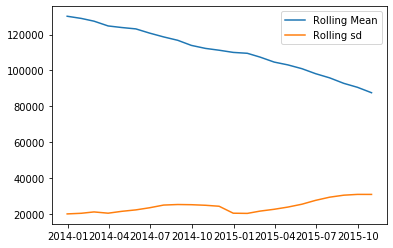

In [798]:
plt.plot(monthly_total_sales.rolling(12).mean(),label='Rolling Mean')
plt.plot(monthly_total_sales.rolling(12).std(),label='Rolling sd')
plt.legend();

### Pivot table method for decomposition

1. Pivot table to aggregate by year and month
2. Input values for decomposition eg. time_series2.values

**If want to plot moving average trend for visualization**,
1. need to extract column of values from pivot table as numpy array
2. Convert numpy array to series for decomposition

In [799]:
timeseries2 = timeseriesNULL.pivot_table(index = ["year","month"], values = "item_cnt_day", aggfunc = "sum")

In [800]:
timeseries2

item_cnt_day
year month              
2013 1          131479.0
     2          128090.0
     3          147142.0
     4          107190.0
     5          106970.0
     6          125381.0
     7          116966.0
     8          125291.0
     9          133332.0
     10         127541.0
     11         130009.0
     12         183342.0
2014 1          116899.0
     2          109687.0
     3          115297.0
     4           96556.0
     5           97790.0
     6           97429.0
     7           91280.0
     8          102721.0
     9           99208.0
     10         107422.0
     11         117845.0
     12         168755.0
2015 1          110971.0
     2           84198.0
     3           82014.0
     4           77827.0
     5           72295.0
     6           64114.0
     7           63187.0
     8           66079.0
     9           72843.0
     10          71056.0

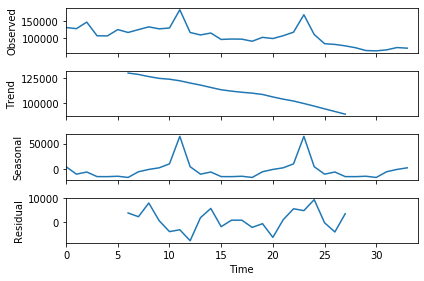

In [801]:
#decomposition using pivot table values
res2 = sm.tsa.seasonal_decompose(timeseries2.values,freq=12,model="additive")
fig = res2.plot()

In [802]:
timeseries2.values

array([[131479.],
       [128090.],
       [147142.],
       [107190.],
       [106970.],
       [125381.],
       [116966.],
       [125291.],
       [133332.],
       [127541.],
       [130009.],
       [183342.],
       [116899.],
       [109687.],
       [115297.],
       [ 96556.],
       [ 97790.],
       [ 97429.],
       [ 91280.],
       [102721.],
       [ 99208.],
       [107422.],
       [117845.],
       [168755.],
       [110971.],
       [ 84198.],
       [ 82014.],
       [ 77827.],
       [ 72295.],
       [ 64114.],
       [ 63187.],
       [ 66079.],
       [ 72843.],
       [ 71056.]])

In [803]:
#preparing data for moving average visualization
timeseries21D = timeseries2.iloc[:,0].values
timeseries21Dseries = pd.Series(timeseries21D)

In [804]:
timeseries2.iloc[:,0].values

array([131479., 128090., 147142., 107190., 106970., 125381., 116966.,
       125291., 133332., 127541., 130009., 183342., 116899., 109687.,
       115297.,  96556.,  97790.,  97429.,  91280., 102721.,  99208.,
       107422., 117845., 168755., 110971.,  84198.,  82014.,  77827.,
        72295.,  64114.,  63187.,  66079.,  72843.,  71056.])

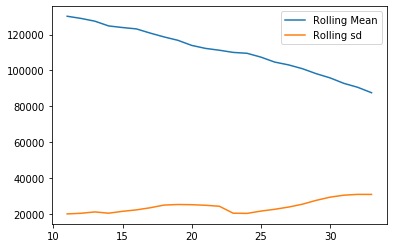

In [805]:
plt.plot(timeseries21Dseries.rolling(12).mean(),label='Rolling Mean')
plt.plot(timeseries21Dseries.rolling(12).std(),label='Rolling sd')
plt.legend();

### Modeling the data

Let us split the dataset into training set and validation set. We shall allocate the last 4 months as our validation set.

In [806]:
monthly_total_sales.tail(5)

,item_cnt_day
date,
2015-06-30,64114.0
2015-07-31,63187.0
2015-08-31,66079.0
2015-09-30,72843.0
2015-10-31,71056.0


In [807]:
Train=monthly_total_sales.loc['2013-01-31':'2015-06-30'] 
valid=monthly_total_sales.loc['2015-07-31':'2015-10-31']

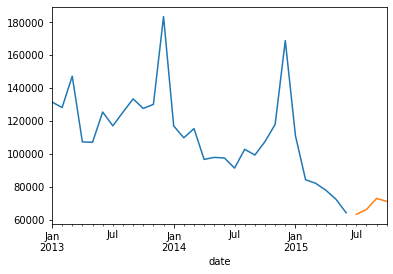

In [808]:
#Visualizing training and validation data
Train.item_cnt_day.plot()
valid.item_cnt_day.plot()

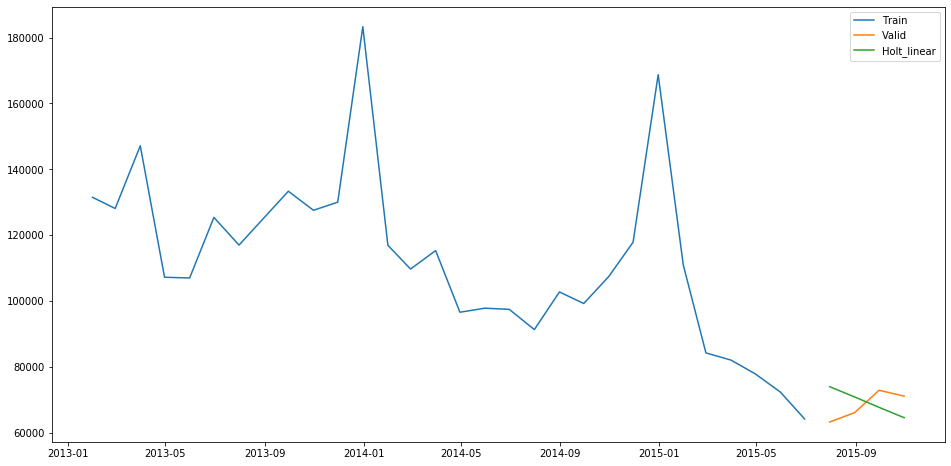

In [809]:
#Before we decompose it, we have to set a frequency. Let's set as daily time series:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np
import matplotlib.pyplot as plt

y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['item_cnt_day'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 

plt.figure(figsize=(16,8)) 
plt.plot(Train['item_cnt_day'], label='Train') 
plt.plot(valid['item_cnt_day'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [810]:
#use RMSE to check accuracy of model on validation set
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.item_cnt_day, y_hat_avg['Holt_linear'])) 
print(rms)

7200.923923271587


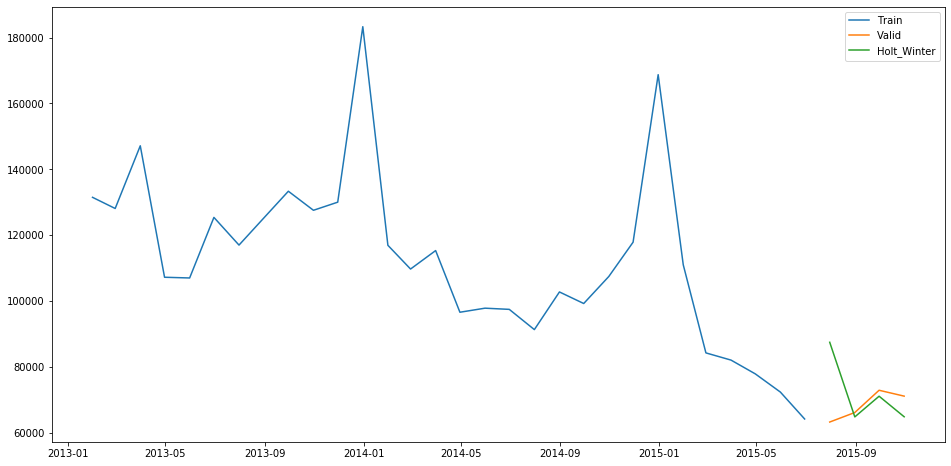

In [811]:
#Let's now try Holt's winter method.

y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['item_cnt_day']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()   #add trend, add seasonality
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))      #predict on validation set

plt.figure(figsize=(16,8)) 
plt.plot( Train['item_cnt_day'], label='Train') 
plt.plot(valid['item_cnt_day'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [812]:
rms = sqrt(mean_squared_error(valid.item_cnt_day, y_hat_avg.Holt_Winter)) 
print(rms)

12570.227290480989


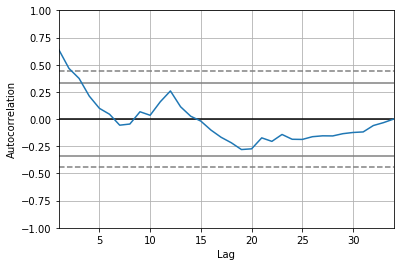

In [813]:
#Now, we shall try the ARIMA method.
#we shall first plot the ACF to see what parameter AR to input
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(monthly_total_sales)
plt.show()

In [814]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(monthly_total_sales, order=(7,1,0))    #set lag value to 7 for autoregression, use difference order of 1 to make time series stationary, use moving average model of 0.
model_fit = model.fit(disp=0)           #disp = 0 to turn debug info off
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.item_cnt_day   No. Observations:                   33
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -374.036
Method:                       css-mle   S.D. of innovations          20016.209
Date:                Sun, 22 Sep 2019   AIC                            766.073
Time:                        18:58:43   BIC                            779.541
Sample:                    02-28-2013   HQIC                           770.604
                         - 10-31-2015                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2062.7790   1502.641     -1.373      0.182   -5007.902     882.344
ar.L1.D.item_cnt_day    -0.3774      0.167     -2.262      0.033      -0.704      -0.050
ar.L2.D.item

## Time Series Analysis: Kaggle Tutorial

Let's follow a well-known Kaggle tutorial to see what we've missed out.

In [815]:
import datetime

sales = pd.read_csv('future_sales/sales_train_v2.csv')
sales.date=sales.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))  #converting date to datetime, in the right format
sales.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [816]:
#aggregate to monthly level the required metrics:
a = sales.pivot_table(index= ["date_block_num","shop_id","item_id"], values = ["date","item_price","item_cnt_day"],aggfunc = {'date':['min','max'],'item_price':'mean','item_cnt_day':'sum'})
a

date            item_cnt_day item_price
                                      max        min          sum       mean
date_block_num shop_id item_id                                              
0              0       32      2013-01-31 2013-01-03          6.0      221.0
                       33      2013-01-28 2013-01-03          3.0      347.0
                       35      2013-01-31 2013-01-31          1.0      247.0
                       43      2013-01-31 2013-01-31          1.0      221.0
                       51      2013-01-31 2013-01-13          2.0      128.5
                       61      2013-01-10 2013-01-10          1.0      195.0
                       75      2013-01-17 2013-01-17          1.0       76.0
                       88      2013-01-16 2013-01-16          1.0       76.0
                       95      2013-01-06 2013-01-06          1.0      193.0
                       96      2013-01-10 2013-01-10          1.0       70.0
                       98      2013-01-31 2013-01-04         25.0      268.0
                       111     2013-01-17 2013-01-17          1.0       89.0
                       149     2013-01-28 2013-01-11          3.0       99.0
                       151     2013-01-16 2013-01-16          1.0       75.0
                       153     2013-01-09 2013-01-09          1.0      258.0
                       198     2013-01-10 2013-01-10          1.0      112.0
                       210     2013-01-25 2013-01-05          2.0      118.0
                       282     2013-01-04 2013-01-04          1.0      109.0
                       306     2013-01-22 2013-01-22          1.0       59.0
                       351     2013-01-21 2013-01-21          1.0       89.0
                       421     2013-01-07 2013-01-07          1.0      162.0
                       438     2013-01-31 2013-01-31          1.0      162.0
                       482     2013-01-14 2013-01-09          2.0     1360.0
                       484     2013-01-30 2013-01-09          4.0      124.0
                       491     2013-01-27 2013-01-27          1.0      361.0
                       498     2013-01-19 2013-01-19          1.0      124.0
                       556     2013-01-25 2013-01-15          9.0       90.0
                       642     2013-01-20 2013-01-06          6.0       90.0
                       651     2013-01-25 2013-01-09          7.0       90.0
                       657     2013-01-18 2013-01-03          2.0       90.0
...                                   ...        ...          ...        ...
33             59      19894   2015-10-23 2015-10-23          1.0      199.0
                       19985   2015-10-11 2015-10-11          1.0      299.0
                       20303   2015-10-07 2015-10-07          1.0      399.0
                       20305   2015-10-09 2015-10-09          1.0      449.0
                       20335   2015-10-23 2015-10-23          1.0     1149.0
                       20355   2015-10-30 2015-10-30          1.0     1249.0
                       20392   2015-10-06 2015-10-06          1.0     2199.0
                       20604   2015-10-23 2015-10-20          2.0      999.0
                       20614   2015-10-09 2015-10-09          1.0     1099.0
                       20629   2015-10-26 2015-10-26          1.0     2399.0
                       20730   2015-10-31 2015-10-31          1.0      499.0
                       20751   2015-10-10 2015-10-10          1.0      699.0
                       20866   2015-10-31 2015-10-01          4.0      699.0
                       20949   2015-10-31 2015-10-02         19.0        5.0
                       21361   2015-10-08 2015-10-08          1.0     1999.0
                       21364   2015-10-24 2015-10-24          1.0      399.0
                       21369   2015-10-31 2015-10-10          2.0      169.0
                       21377   2015-10-24 2015-10-24          1.0      169.0
                       21386   20

In [817]:
#Let's aggregate total sales by month
ts = sales.pivot_table(index = "date_block_num", values ="item_cnt_day",aggfunc = "sum")
ts.head(5)

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0


Text(0, 0.5, 'Sales')

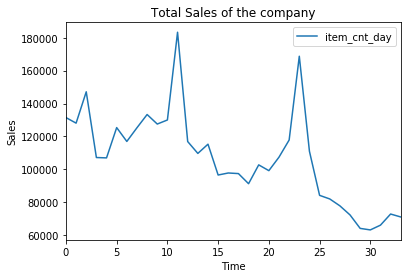

In [818]:
ts.plot()
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')

From the above graph, we observe there is seasonality eg. peak sales at a time of the year

We can verify this using seasonal decomposition.

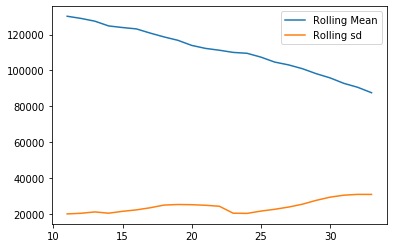

In [819]:
#use rolling average to spot trend
plt.plot(ts.rolling(12).mean(),label='Rolling Mean')
plt.plot(ts.rolling(12).std(),label='Rolling sd')
plt.legend();

From the above graph, We observe that there is a decreasing trend

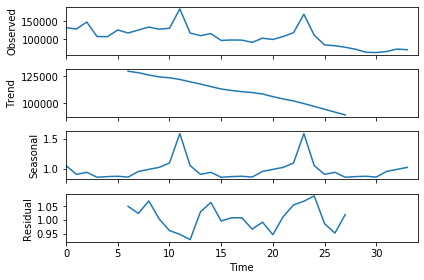

In [820]:
import statsmodels.api as sm
#Multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()

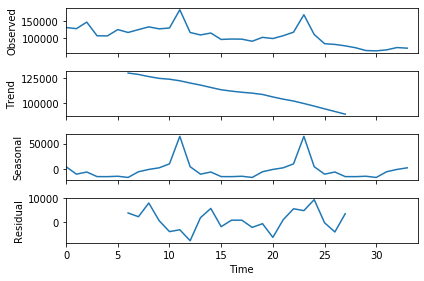

In [821]:
import statsmodels.api as sm
#Additive
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()

we assume an additive model, then we can write

- yt=St+Tt+Et

where yt is the data at period t, St is the seasonal component at period t, Tt is the trend-cycle component at period tt and Et is the remainder (or irregular or error) component at period t. Similarly for Multiplicative model,

- yt=St x Tt x Et

Let's check for stationarity of the data:
1. Mean of the series should not be a function of time.
2. Variance of the series should not be a function of time.
3. Covariance of the series should not be a function of time. 

When a time series is stationary, it can be easier to model. We can use the Augmented Dicky Fuller test to check stationarity:

In [822]:
# Stationarity tests
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

ts1D = ts.iloc[:,0].values         #adfuller only takes in 1D array
test_stationarity(ts1D)

Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


p-value is greater than 0.05, therefore series is still not stationary. We can remove the trend and remove the seasonality to see if it improves the stationarity of the series

In [823]:
# to remove trend
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):                 
    diff = list()
    for i in range(interval, len(dataset)):              #for dataset[i] to work, dataset must be of a suitable type eg. numpy array
        value = dataset[i] - dataset[i - interval]       #value: current value - value at previous time step
        diff.append(value)                               #append to list the value
    return Series(diff)                                  #return list of difference values

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

[]

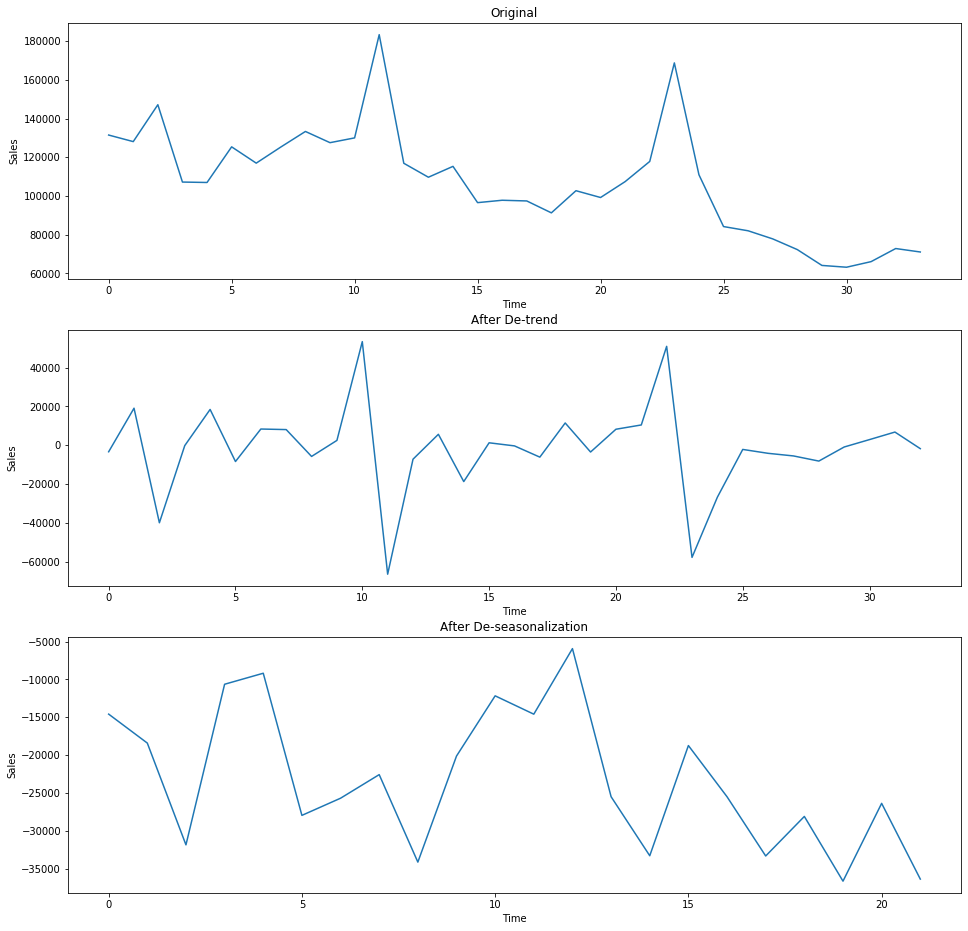

In [824]:
ts1D.astype('float')
plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts1D)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts1D)    #ts doesn't work, since it's an object and dataset[i] doesn't work on objects
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts1D,12)       # assuming the seasonality is 12 months long
plt.plot(new_ts)
plt.plot()

In [825]:
# now testing the stationarity again after de-seasonality
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                 -3.270101
p-value                         0.016269
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


After deseasonality, we now observe our p-value to be lower than 0.05, showing stationarity of the series.

**ACF and PACF plots**:

While fitting an arima model, we need to find correct 'p', 'd' and 'q'.

We find 'd' by differencing the data number of times till it becomes stationary.

ACF and PACF plots are very useful in determining the values of p and q.

C:\Users\Hong.Wen.Tai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


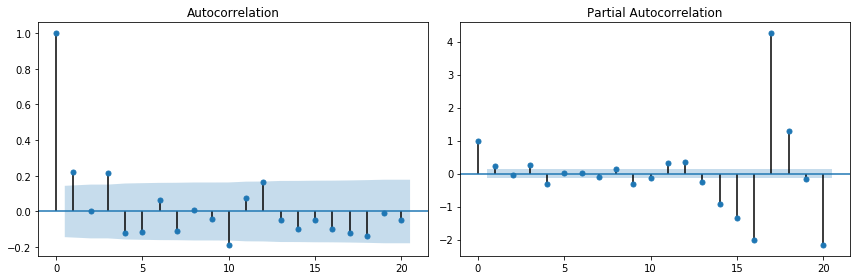

In [826]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(new_ts, lags=20, ax=axes[0], alpha=0.5)
plot_pacf(new_ts, lags=20, ax=axes[1], alpha=0.5)
plt.tight_layout()

The lag value where the PACF graph crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

The lag value where the ACF graph crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

Let's fit ARIMA model with (2,1,2):
p = 2, d = 1, q = 2

In [827]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(new_ts, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())                        #smallest AIC value is the best

#plt.plot(new_ts, color='blue')
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues - new_ts['item_cnt_day'])**2))
#print('Plotting ARIMA model')

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   21
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -219.664
Method:                       css-mle   S.D. of innovations           8022.080
Date:                Sun, 22 Sep 2019   AIC                            451.329
Time:                        18:59:57   BIC                            457.596
Sample:                             1   HQIC                           452.689
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1117.5707   1649.938     -0.677      0.508   -4351.389    2116.248
ar.L1.D.y     -1.1520      0.134     -8.577      0.000      -1.415      -0.889
ar.L2.D.y     -0.9178      0.113     -8.098      0.0

We observed that the p value of the 2nd MA term is > 0.05, therefore the term is not significant. We will therefore remove it, by creating model of order (2,1,1)

In [828]:
model = ARIMA(new_ts, order=(2,1,1))
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())    

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   21
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -219.900
Method:                       css-mle   S.D. of innovations           8255.865
Date:                Sun, 22 Sep 2019   AIC                            449.801
Time:                        18:59:57   BIC                            455.024
Sample:                             1   HQIC                           450.934
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -787.6851   1167.440     -0.675      0.509   -3075.825    1500.455
ar.L1.D.y     -0.9154      0.211     -4.328      0.000      -1.330      -0.501
ar.L2.D.y     -0.6851      0.168     -4.088      0.0

We observe that the AIC of the model has improved.

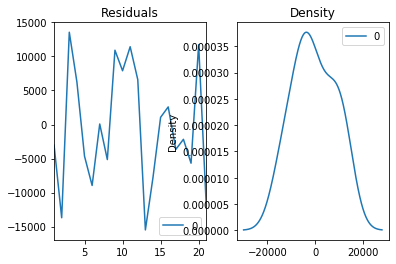

                  0
count     21.000000
mean    -480.646165
std     8766.906814
min   -15485.028382
25%    -5680.450623
50%    -2175.766483
75%     6597.641590
max    13557.221073


In [829]:
# Plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])              #see if there's remaining trend info that wasn't captured by the model
residuals.plot(kind='kde', title='Density', ax=ax[1])    #errors may not be centered on zero
plt.show()
print(residuals.describe())                           

Indeed, there is bias in the prediction (non-zero mean in the residuals)

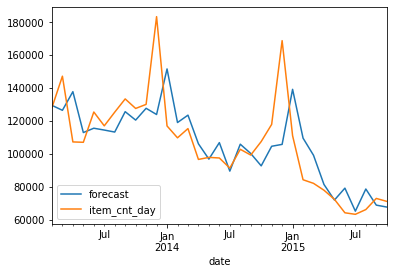

In [830]:
#plot actuals vs fitted values
model_fit.plot_predict(dynamic=False)  #shows predictions in terms of original series
plt.show()

**For the following section, we are using results_ARIMA.fitted values, but we realise that the numbers revolve around 0 and quite a number are negative. This is because fitted values are predictions of the differenced series. We should use the above for predictions in terms of original series instead.**

In [831]:
#Can also see that the reseries has become more stationary
test_stationarity(results_ARIMA.fittedvalues)

Results of Dickey-Fuller Test:
Test Statistic                 -3.676446
p-value                         0.004457
#Lags Used                      3.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


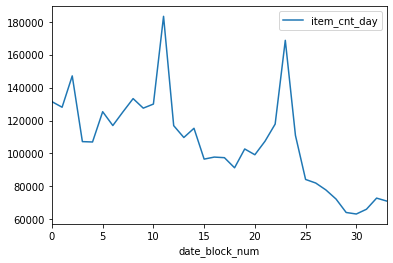

In [832]:
ts.plot()

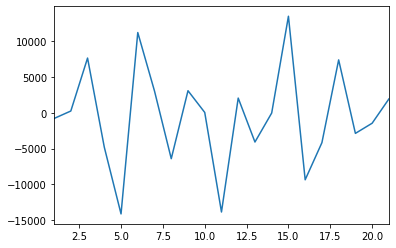

In [833]:
results_ARIMA.fittedvalues.plot()

In [834]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff

1      -787.685141
2       255.586373
3      7653.778927
4     -4796.565788
5    -14121.119414
6     11218.420464
7      3040.388099
8     -6404.887088
9      3090.029533
10       55.909274
11   -13852.166671
12     2061.358410
13    -4075.971618
14      -23.822054
15    13496.181079
16    -9351.230890
17    -4165.617236
18     7397.766483
19    -2868.549377
20    -1450.171022
21     1935.937120
dtype: float64

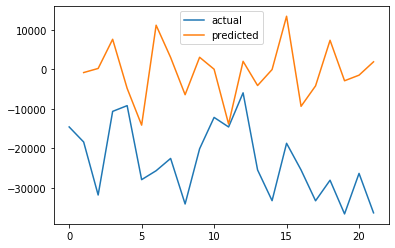

In [835]:
plt.plot(new_ts, label = "actual")
plt.plot(predictions_ARIMA_diff, label = "predicted")
plt.legend()

**Takeaways:**
- be careful of using circle brackets or square brackets when using functions
- be careful of what the axes represent when using pandas plot, may tell a totally different story eg. max item_count, rather than the sum
   > depending on objective, might be better to aggregate first using pivot table
- pivot table returns an object, which certain function doesn't work, such as dataset[i]
   > in this case need to select a column and make it into a suitable datatype such as numpy array
   
   > ts1D = ts.iloc[:,0].values 
   
- Determine at what granularity/frequency to work at is the best
   > if too granular, will be hard to see trend. Will have problems fitting model too
   
   > can do it by visualizations such as decompositions
   
- DatetimeIndex has the normal functionality of a Dataframe (can use .loc to index, can use pivot table) plus additional features
- ARIMA model: use ACF to determine AR parameter, use Dickey Fuller test to test stationarity